# **Byzantine Emperors (330-1453)**


---


In this notebook, we will be analyzing a dataset containing information about the Byzantine emperors who ruled during 330-1453. We will be using EDA techniques to gain insights into the patterns and trends of their reigns, such as the length of their rule, their causes of death, their military campaigns, and their achievements.


---


By conducting EDA on this dataset, we hope to gain a deeper understanding of the Byzantine Empire and the people who shaped its history. Whether you are a history enthusiast or a data analyst, we invite you to join us on this journey of discovery through the world of Byzantine emperors.


---

The *DATASET* can also be found here: https://www.kaggle.com/datasets/georgescutelnicu/byzantine-emperors-3301453

---

<img src='https://www.historyadventures.co/wp-content/uploads/2022/07/intro-1591216178.jpg' width="666" height="350">

**Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

**Data exploration**

In [2]:
df = pd.read_csv('ByzantineEmperors.csv')

In [3]:
df.head()

,Name,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dinasty
0,Constantine I,306,337,280,337,Moesia,Bithynia,Natural Causes,Constantinian
1,Constantine II,337,361,317,361,Pannonia,Cilicia,Natural Causes,Constantinian
2,Julian,361,363,331,363,Constantinople,Mesopotamia,Died on Campaign,Constantinian
3,Jovian,363,364,331,364,Moesia,Bithynia,?,non-dynastic
4,Valentinian I,364,375,321,375,Panonia,Panonia,Natural Causes,Valentinian


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               95 non-null     object
 1   Start_of_reign     95 non-null     int64 
 2   End_of_reign       95 non-null     int64 
 3   Year_of_birth      95 non-null     object
 4   Year_of_death      95 non-null     object
 5   Location_of_birth  95 non-null     object
 6   Location_of_death  95 non-null     object
 7   Cause_of_death     95 non-null     object
 8   Dinasty            95 non-null     object
dtypes: int64(2), object(7)
memory usage: 6.8+ KB


In [5]:
for col in df.columns:
  missing_values = len(df[df[col] == '?'])
  print(f'{col} --> {missing_values} missing values')

Name --> 0 missing values
Start_of_reign --> 0 missing values
End_of_reign --> 0 missing values
Year_of_birth --> 6 missing values
Year_of_death --> 1 missing values
Location_of_birth --> 20 missing values
Location_of_death --> 13 missing values
Cause_of_death --> 2 missing values
Dinasty --> 0 missing values


**Replace '?' with values**

In [6]:
median_age_rulers_begin_their_reign = (df.loc[df.Year_of_birth != '?', 'Start_of_reign'] - 
                                        df.loc[df.Year_of_birth != '?', 'Year_of_birth'].astype(int)).median()

df.loc[df.Year_of_birth == '?', 'Year_of_birth'] = (df.loc[df.Year_of_birth == '?', 'Start_of_reign'] - median_age_rulers_begin_their_reign).astype(int)

In [7]:
df.loc[df.Year_of_death == '?', 'Year_of_death'] = df.loc[df.Year_of_death == '?', 'End_of_reign']  

In [8]:
df.Cause_of_death.replace('?', df.Cause_of_death.mode().item(), inplace=True)

In [9]:
df.replace('?', 'Unknown', inplace=True)

**Create columns for how much time each emperor lived and reigned**

In [10]:
df['Years_ruled'] = df['End_of_reign'] - df['Start_of_reign']

In [11]:
df['Year_of_birth'] = df['Year_of_birth'].astype('int')
df['Year_of_death'] = df['Year_of_death'].astype('int')

In [12]:
df['Years_lived'] = df['Year_of_death'] - df['Year_of_birth']

**Explore the place of birth/death of each emperor**

In [13]:
burst = px.sunburst(df,
                    path=['Location_of_birth', 'Name'], 
                    width=500, 
                    height=500,
                    title='Location of birth')

burst.show()

In [14]:
burst = px.sunburst(df,
                    path=['Location_of_death', 'Name'], 
                    width=500, 
                    height=500,
                    title='Location of death')

burst.show()

**Cause of death of the emperors**

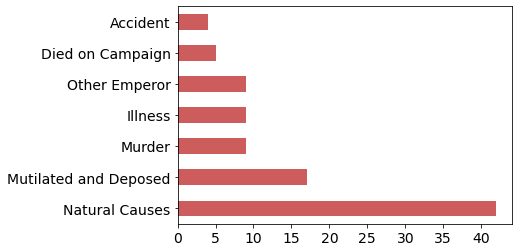

In [15]:
df.Cause_of_death.value_counts().plot(kind='barh', color='indianred')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

**Cause of death by Dinasty/Years ruled**

In [16]:
cause_of_death_dict = {
    'Natural Causes': 1,
    'Mutilated and Deposed': 2,
    'Illness': 3,
    'Murder': 4,
    'Other Emperor': 5,
    'Died on Campaign': 6,
    'Accident': 7
}

df_scatter = df[['Years_ruled', 'Cause_of_death', 'Dinasty']]
df_scatter['Cause_of_death'] = df_scatter['Cause_of_death'].apply(lambda x: cause_of_death_dict[x])

<ipython-input-16-1d9daa5139bf>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



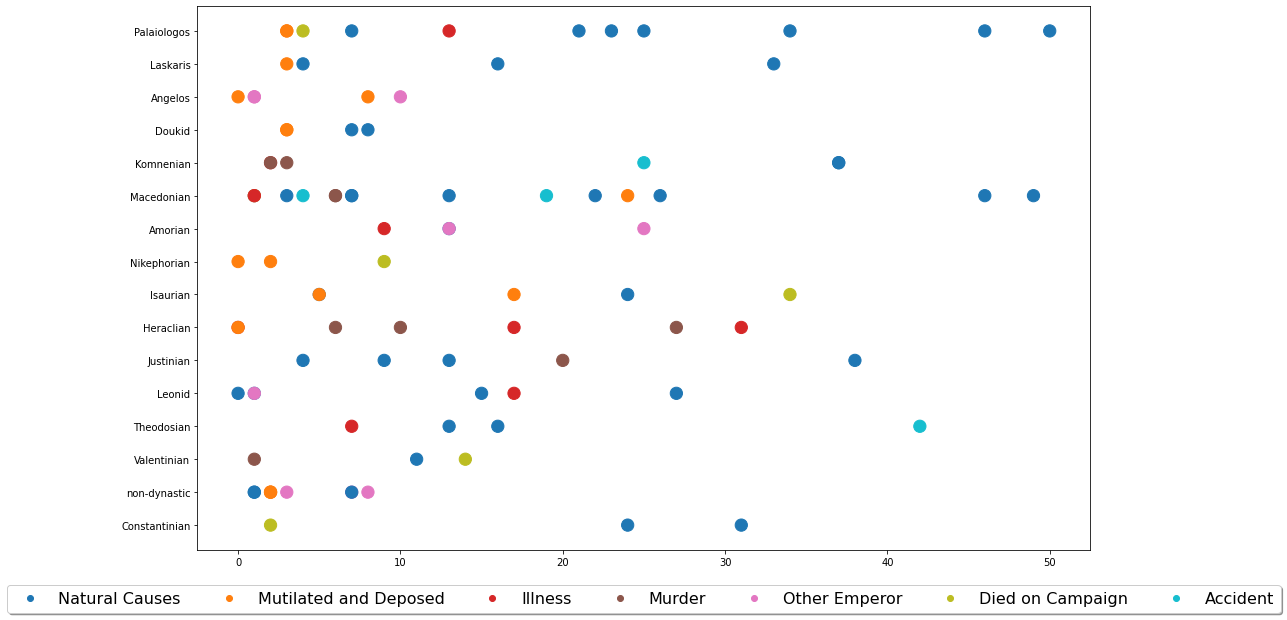

In [17]:
fig, ax = plt.subplots(figsize=(16,10))

scatter = ax.scatter(x=df_scatter['Years_ruled'],
                     y=df_scatter['Dinasty'],
                     c=df_scatter['Cause_of_death'],
                     cmap='tab10',
                     s=150)

legend_dict = dict(ncol=1, loc='best', fancybox=True, shadow=True)
plt.legend(handles=scatter.legend_elements()[0], labels=cause_of_death_dict.keys(),
           prop={'size': 16}, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=7)

fig.show()

**At what age did the emperors start their reign?**

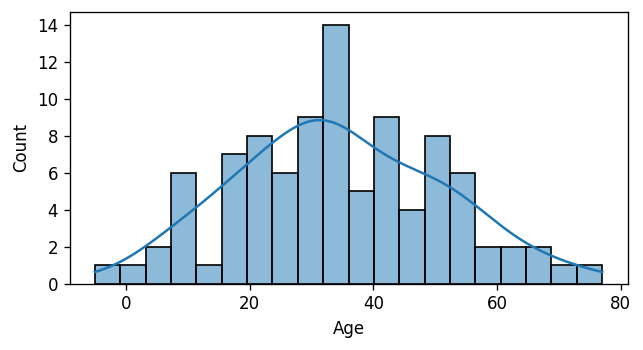

In [18]:
plt.figure(figsize=(6, 3), dpi=120)

sns.histplot(x=df['Start_of_reign'] - df['Year_of_birth'],
             bins=20,
             kde=True
)

plt.xlabel('Age')
plt.show()

**How much the emperors lived**

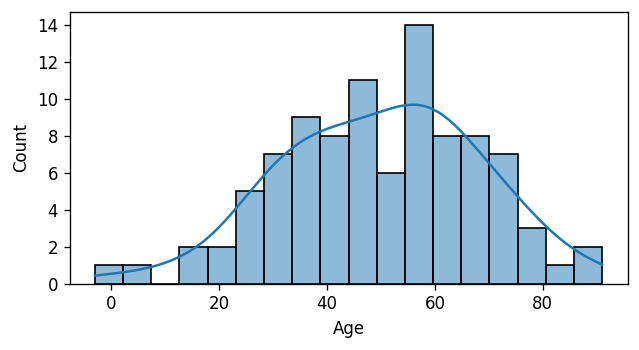

In [19]:
plt.figure(figsize=(6, 3), dpi=120)

sns.histplot(x=df['Years_lived'],
             bins=18,
             kde=True
)

plt.xlabel('Age')
plt.show()

**How much time each dinasty ruled**

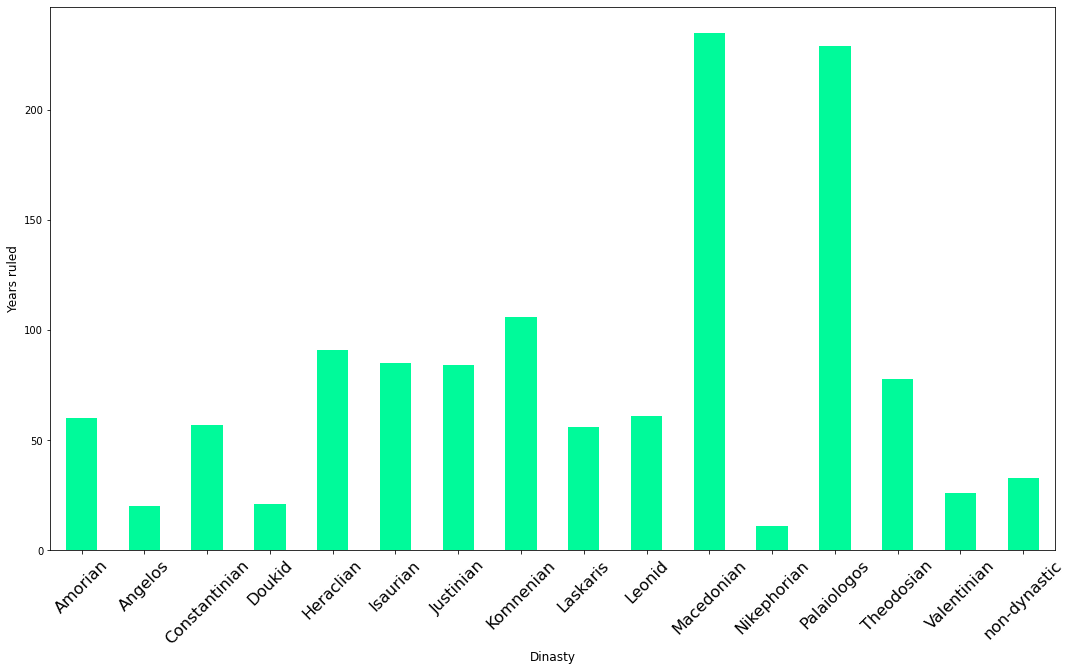

In [20]:
df[['Years_ruled', 'Dinasty']].groupby(['Dinasty']).sum().plot(kind='bar', color='mediumspringgreen', figsize=(18, 10), legend=False)
plt.xlabel('Dinasty', fontsize=12)
plt.ylabel('Years ruled', fontsize=12)
plt.xticks(rotation=45, fontsize=16)
plt.show()

**Name of the emperors**

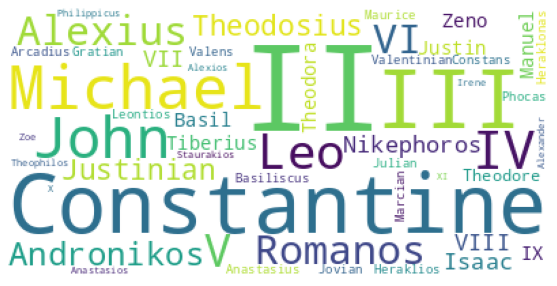

In [21]:
from wordcloud import WordCloud

text = ' '.join(i for i in df.Name)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off");

<img src='https://pic.funnygifsbox.com/uploads/2020/11/funnygifsbox.com-2020-11-01-02-55-07-68.gif'>